<a href="https://colab.research.google.com/github/cecilegltslmcs/cats-classification/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats Classifier

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, Sequential

%matplotlib inline

In [ ]:
# Google Drive connexion
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Projets/Cats-classification/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Reading a random picture

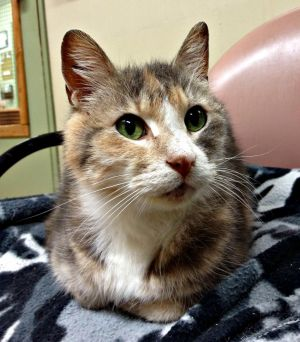

In [ ]:
name = "Dilute Calico/31860731_7498.jpg"
fullname = f'{path}/{name}'

# print a kitty picture
load_img(fullname)

In [ ]:
# changing size
img = load_img(fullname, target_size=(299,299))

In [ ]:
x = np.array(img)
x.shape

(299, 299, 3)

## 2) Exploratory Data Analysis

Let's examine the number of breeds we have and the numbers of pictures for each.

In [ ]:
csv_name = "cats.csv"
path_csvfile = f"{path}/{csv_name}"
df = pd.read_csv(path_csvfile)

FileNotFoundError: ignored

## 3) Modelisation

### a) Preparing the data

In [ ]:
img_height = 299
img_width = 299
batch_size = 32
channel = 3
num_classes = 67

In [ ]:
# Creating a train set
train_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

In [ ]:
# Creating a validation set
val_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1188 files belonging to 7 classes.
Using 237 files for validation.


### b) Custom CNN

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(img_height, img_width, channel)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_entropy,
    metrics=["accuracy"]
)

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
t0 = time()

epochs = 10

# training model + time measure
history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs)

print("Done in %0.3fs." % (time() - t0))

In [ ]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

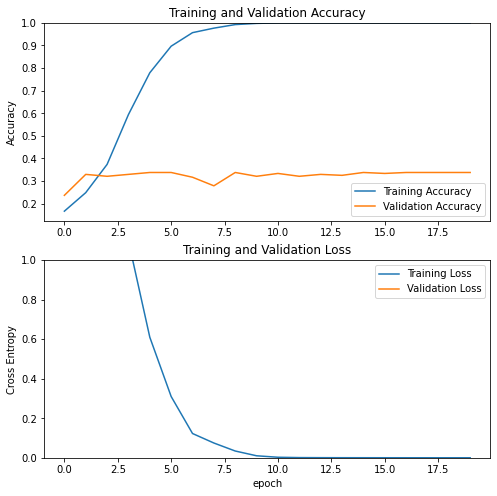

In [ ]:
# Accuracy and Loss graphical representation
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
mean_accuracy = np.mean(history.history["accuracy"])
std_accuracy = np.std(history.history["accuracy"])
mean_validation_accuracy = np.mean(history.history["val_accuracy"])
std_validation_accuracy = np.std(history.history["val_accuracy"])

mean_loss = np.mean(history.history["loss"])
std_loss = np.std(history.history["loss"])
mean_validation_loss = np.mean(history.history["loss"])
std_validation_loss = np.std(history.history["loss"])

In [ ]:
print(f"Mean Accuracy: {mean_accuracy} +/- {std_accuracy} & Mean Validation Accuracy: {mean_validation_accuracy} +/- {std_validation_accuracy}")
print(f"Mean Loss: {mean_loss} +/- {std_loss} & Mean Validation Loss: {mean_validation_loss} +/- {std_validation_loss}")

**Some resources about Optimizer and Loss Functions when performing a multiclasses classification:**

- [Adam Optimizer for multiclasses classification](https://towardsdatascience.com/multiclass-classification-neural-network-using-adam-optimizer-fb9a4d2f73f4)
- [Understanding Loss functions for classification](https://medium.com/mlearning-ai/understanding-loss-functions-for-classification-81c19ee72c2a)

### b) Transfer Learning

- MobileNet
- VGG16/19
- Xception
- EfficientBNet